<a href="https://colab.research.google.com/github/Geolist/first-repository/blob/main/%EB%8D%B0%EC%8B%B84%EA%B8%B0_%ED%9A%8C%EA%B7%80_%EC%9E%90%EC%A0%84%EA%B1%B0%EC%9D%98_%EC%82%AC%EB%B3%B8_%EB%B0%95%EB%B3%91%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  🚲 이 코드는 Kaggle에서 데이터를 받아와서 Colab에서 진행한 코드입니다

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

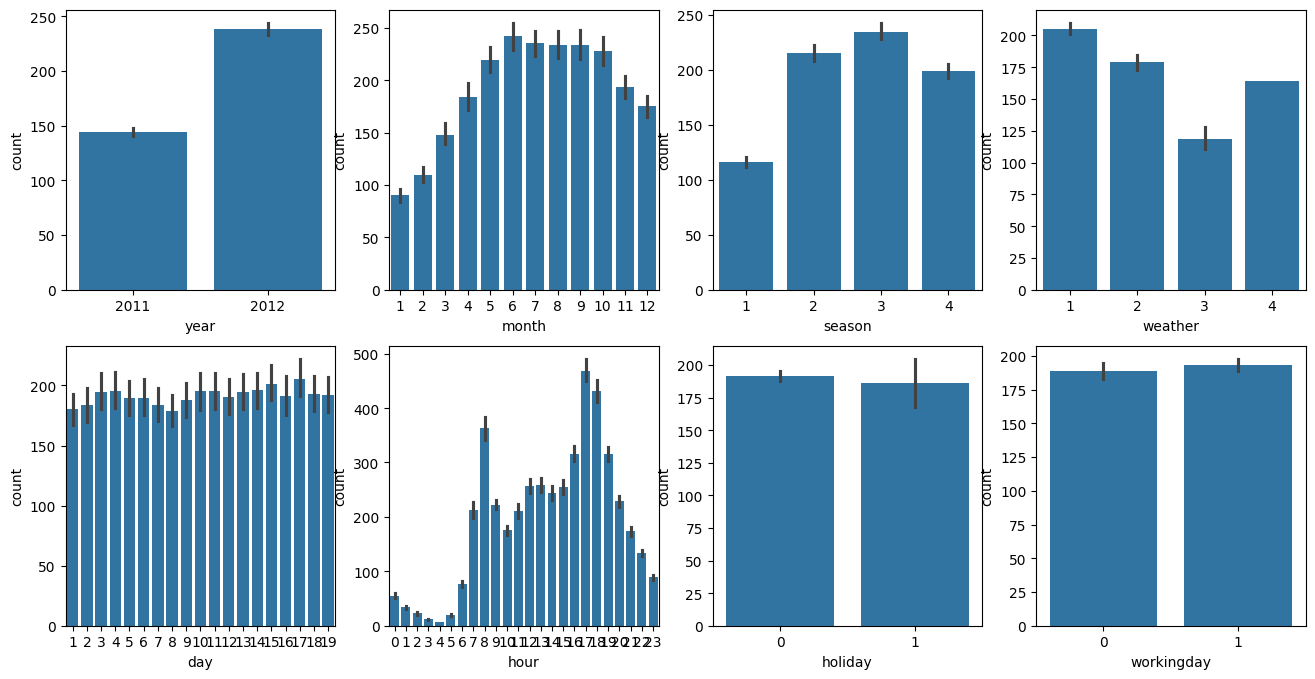

In [ ]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

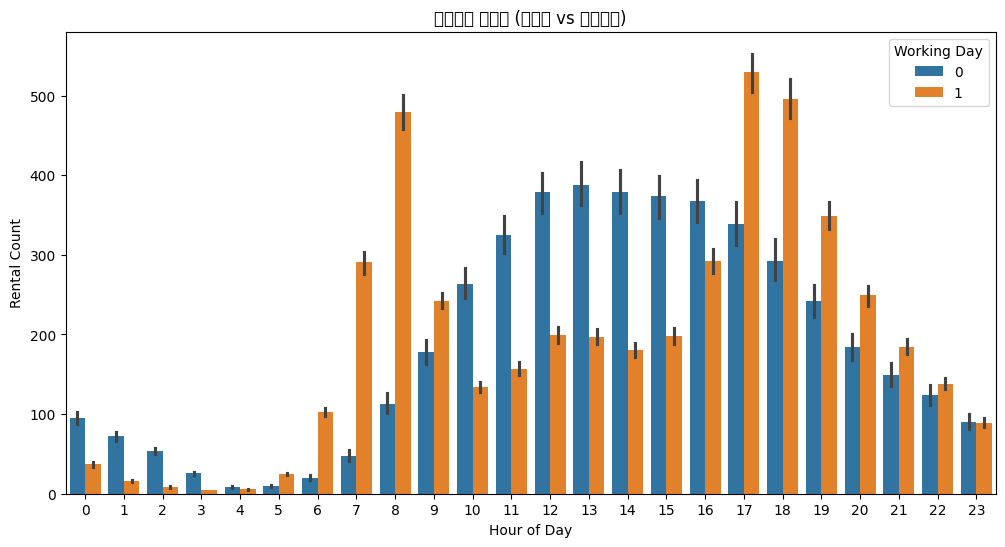

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bike_df, x='hour', y='count', hue='workingday')
plt.title('시간대별 대여량 (근무일 vs 비근무일)')
plt.xlabel('Hour of Day')
plt.ylabel('Rental Count')
plt.legend(title='Working Day')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

# 로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [ ]:
result_df = X_test.copy()
result_df['actual'] = y_test
result_df['predicted'] = pred
result_df['error'] = abs(result_df['actual'] - result_df['predicted'])
# result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

In [ ]:
result_df_sorted = result_df.sort_values(by='error', ascending=False)
result_df_sorted.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,actual,predicted,error
9944,4,0,1,2,23.78,27.275,64,22.0028,2012,10,18,17,890,322.117787,567.882213
9921,4,0,1,1,21.32,25.000,59,11.0014,2012,10,17,18,884,326.704555,557.295445
9767,4,0,1,1,15.58,19.695,46,26.0027,2012,10,11,8,798,241.365876,556.634124
9791,4,0,1,1,17.22,21.210,71,6.0032,2012,10,12,8,745,193.895003,551.104997
7281,2,0,1,1,22.96,26.515,73,15.0013,2012,5,2,18,813,266.977808,546.022192
9536,4,0,1,3,22.96,26.515,60,16.9979,2012,10,1,17,856,310.080940,545.919060
10510,4,0,1,2,18.04,21.970,88,11.0014,2012,12,4,8,721,176.740660,544.259340
9383,3,0,1,2,24.60,28.790,78,11.0014,2012,9,14,8,766,222.362124,543.637876
9719,4,0,1,2,17.22,21.210,80,12.9980,2012,10,9,8,713,170.723496,542.276504
6864,2,0,1,2,18.04,21.970,72,7.0015,2012,4,4,8,684,142.451960,541.548040


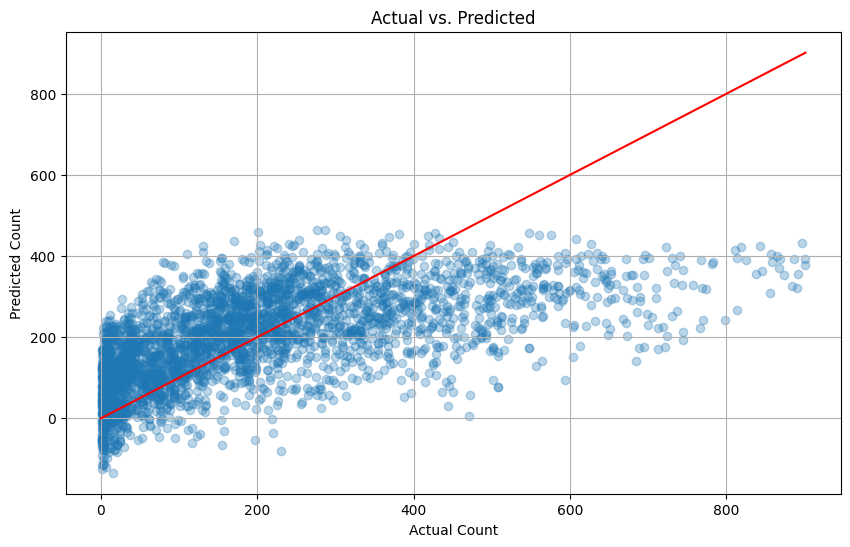

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(result_df['actual'], result_df['predicted'], alpha=0.3)
plt.plot([0, max(result_df['actual'])], [0, max(result_df['actual'])], color='red')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

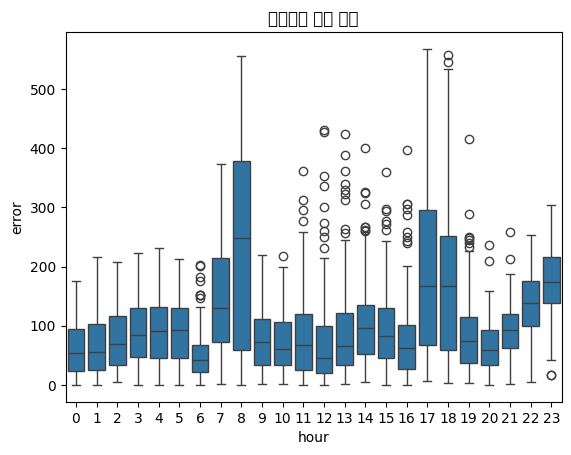

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=result_df, x='hour', y='error')
plt.title('시간대별 오차 분포')
plt.show()

In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
966          884            327.0  557.0
3151         798            241.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

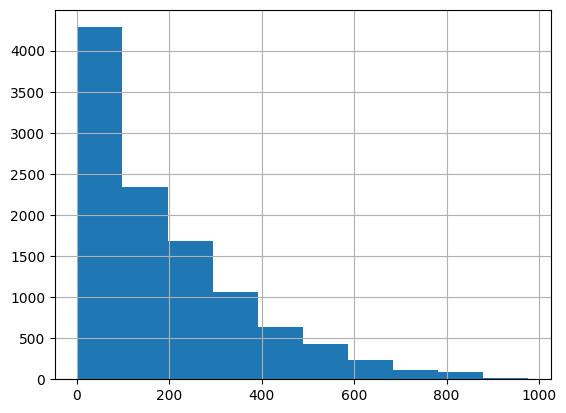

In [ ]:
y_target.hist()

<Axes: >

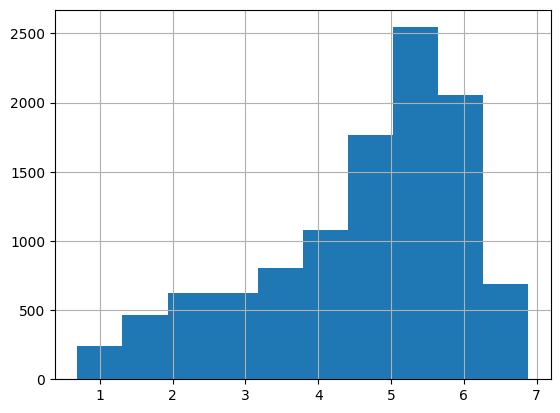

In [ ]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [ ]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


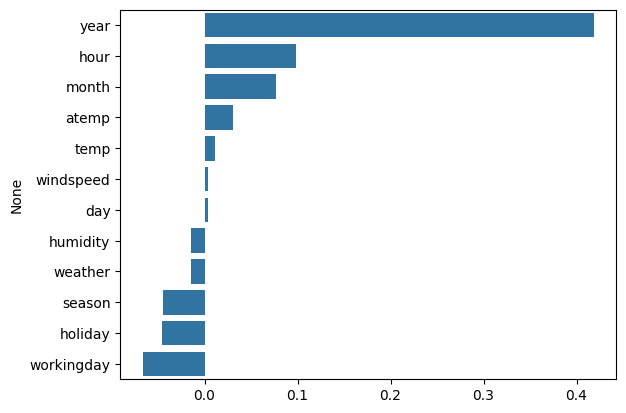

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')

In [ ]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding

# 없는 day까지 encoding
X_features['day'] = pd.Categorical(X_features['day'], categories=range(1, 31))


X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [ ]:
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10882,14.76,17.425,57,15.0013,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10883,13.94,15.910,61,15.0013,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10884,13.94,17.425,61,6.0032,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False


In [ ]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.001)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.524, MAE: 63.892
### Lasso ###
RMSLE: 0.589, RMSE: 98.277, MAE: 63.442


## LassoCV란?
- **Lasso 회귀 + 교차 검증(Cross Validation)**을 통해
- 여러 alpha 후보 중에서 가장 예측 성능이 좋은 값을 자동으로 선택

In [ ]:
from sklearn.linear_model import LassoCV

# LassoCV는 기본적으로 5-fold 교차 검증을 수행합니다.
# alphas는 시도할 후보 alpha 값들의 리스트입니다.
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1],
                   cv=5,
                   max_iter=10000,
                   random_state=42)

# 모델 학습 (로그 변환된 타깃 사용)
lasso_cv.fit(X_train, y_train)

# 최적의 alpha 값 출력
print("최적 alpha 값:", lasso_cv.alpha_)


최적 alpha 값: 0.0001


In [ ]:
# 예측
pred = lasso_cv.predict(X_test)

# 로그 → 원래 단위로 복원
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

# 평가
evaluate_regr(y_test_exp, pred_exp)


RMSLE: 0.590, RMSE: 97.698, MAE: 63.359


0으로 줄어든 변수 개수: 16


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

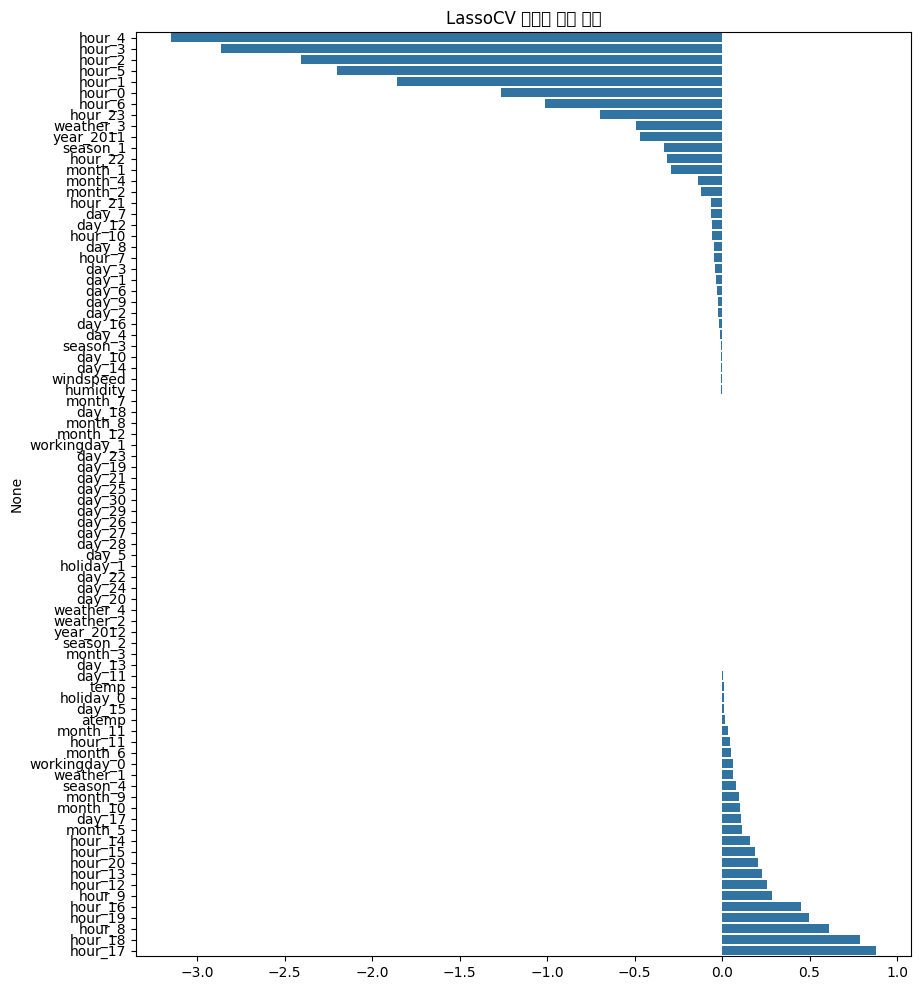

In [ ]:
lasso_coef = pd.Series(lasso_cv.coef_, index=X_features_ohe.columns)
print("0으로 줄어든 변수 개수:", (lasso_coef == 0).sum())

# 영향력 시각화
import seaborn as sns
import matplotlib.pyplot as plt

coef_sorted = lasso_coef.sort_values()
plt.figure(figsize=(10, 12))
sns.barplot(x=coef_sorted.values, y=coef_sorted.index)
plt.title("LassoCV 선택된 피처 계수")
plt.show()


## RidgeCV로 최적 alpha 찾기

In [ ]:
from sklearn.linear_model import RidgeCV

# alpha 후보 목록을 지정 (직접 튜닝 가능)
alphas = [0.01, 0.1, 1, 10, 50, 100]

# RidgeCV는 내부적으로 교차검증 (기본은 Leave-One-Out 이지만 cv 설정 가능)
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# 학습 (로그 변환된 타깃 사용)
ridge_cv.fit(X_train, y_train)

# 최적 alpha 확인
print("최적 alpha 값:", ridge_cv.alpha_)


최적 alpha 값: 0.1


In [ ]:
# 예측
pred = ridge_cv.predict(X_test)

# 로그 역변환
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

# 평가
evaluate_regr(y_test_exp, pred_exp)


RMSLE: 0.590, RMSE: 97.693, MAE: 63.385


0으로 줄어든 변수 개수: 12


<ipython-input-52-85faaef565ef>:13: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-85faaef565ef>:13: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-85faaef565ef>:13: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-85faaef565ef>:13: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-85faaef565ef>:13: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-85faaef565ef>:13: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-85faaef565ef>:13: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/

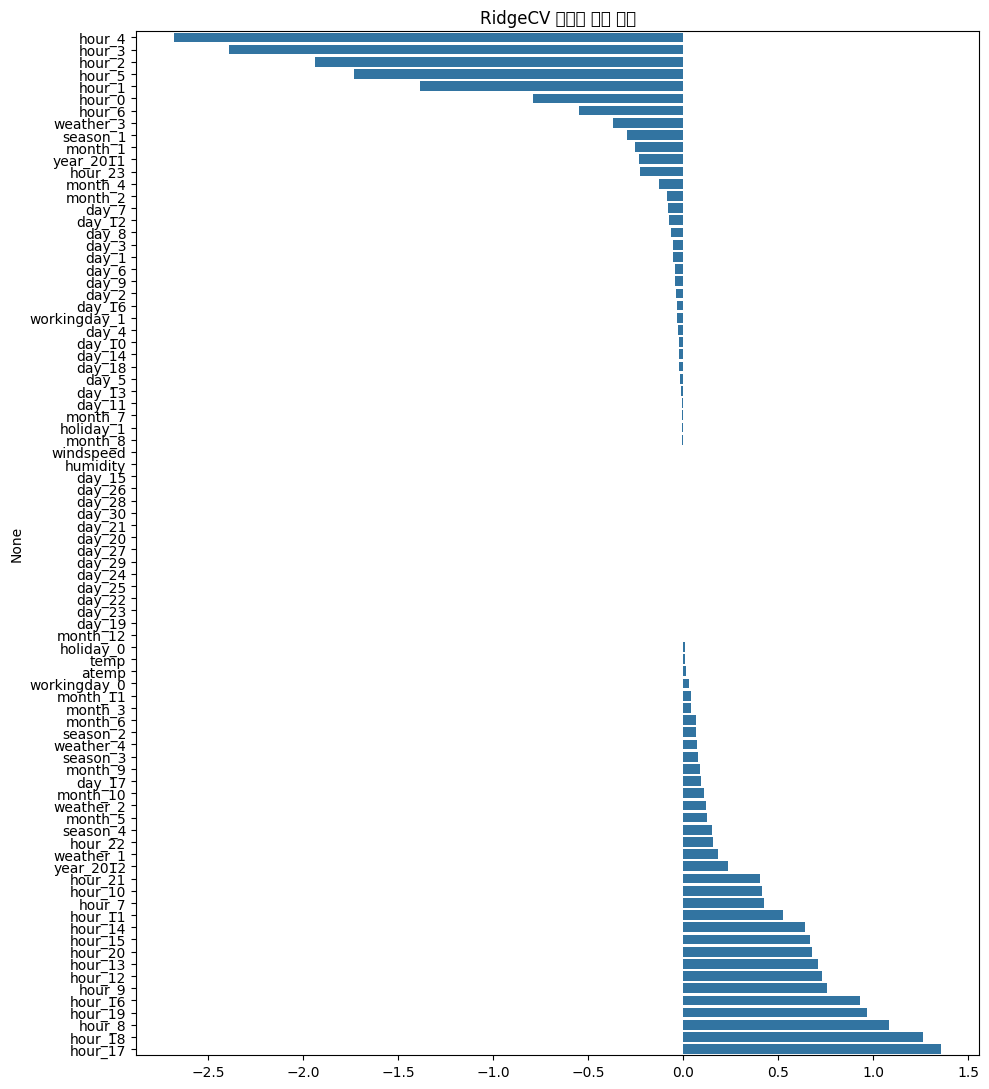

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ridge_coef = pd.Series(ridge_cv.coef_, index=X_features_ohe.columns)
print("0으로 줄어든 변수 개수:", (ridge_coef == 0).sum())


ridge_coef = pd.Series(ridge_cv.coef_, index=X_features_ohe.columns)
ridge_coef_sorted = ridge_coef.sort_values()

plt.figure(figsize=(10, 11))
sns.barplot(x=ridge_coef_sorted.values, y=ridge_coef_sorted.index)
plt.title("RidgeCV 선택된 피처 계수")
plt.tight_layout()
plt.show()




# 최적 알파 찾아서 다시 적용

In [ ]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1)
lasso_reg = Lasso(alpha=0.001)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 97.693, MAE: 63.385
### Lasso ###
RMSLE: 0.589, RMSE: 98.277, MAE: 63.442


<Axes: ylabel='None'>

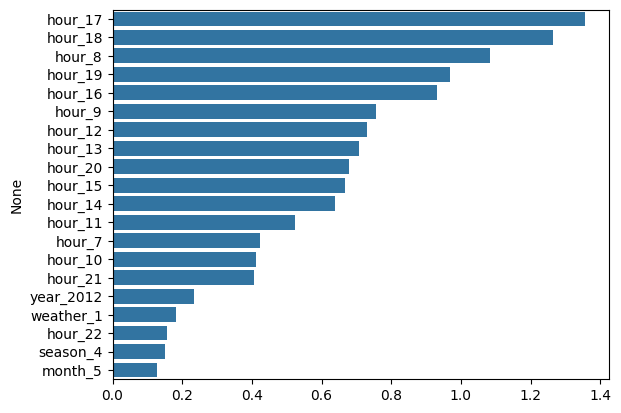

In [ ]:
#가장 영향력 큰 피처 20개를 시각화(가장 큰 상위 20개 (예: 양의 영향이 큰 변수)
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)



<ipython-input-58-909783df7bbe>:9: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-909783df7bbe>:9: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-909783df7bbe>:9: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-909783df7bbe>:9: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-909783df7bbe>:9: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-909783df7bbe>:9: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-909783df7bbe>:9: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

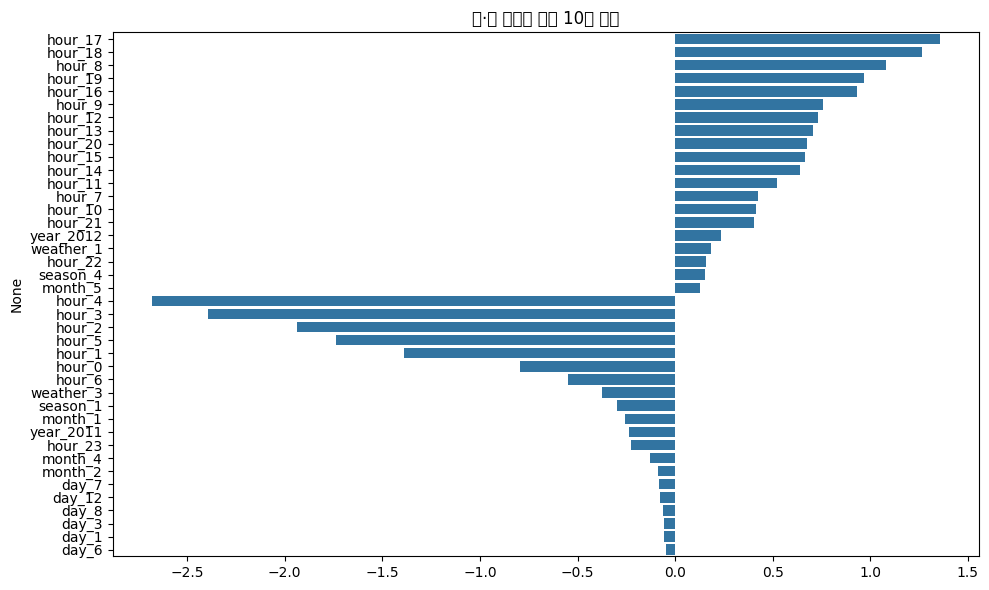

In [ ]:
# 양수/음수 상위 각각 10개 보기
coef_sort_top = coef.sort_values(ascending=False)[:20]
coef_sort_bottom = coef.sort_values()[:20]
coef_concat = pd.concat([coef_sort_top, coef_sort_bottom])

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_concat.values, y=coef_concat.index)
plt.title("양·음 영향력 상위 10개 피처")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.308, MAE: 31.163
### GradientBoostingRegressor ###
RMSLE: 0.331, RMSE: 53.618, MAE: 32.990
### XGBRegressor ###
RMSLE: 0.343, RMSE: 50.964, MAE: 31.291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 71
[LightGBM] [Info] Start training from score 4.582043


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### LGBMRegressor ###
RMSLE: 0.316, RMSE: 47.280, MAE: 28.870


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

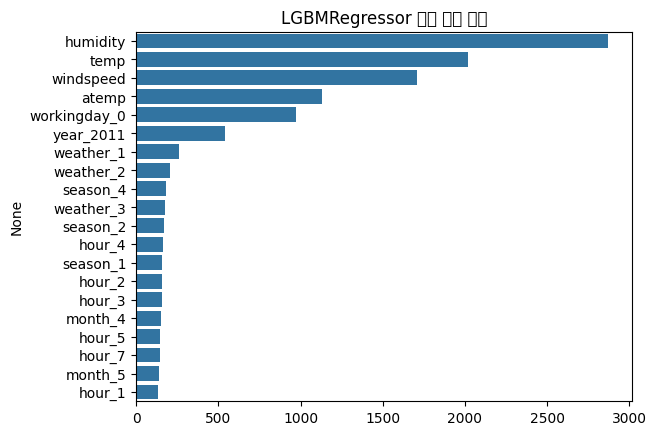

In [ ]:
# 피처 중요도(feature importance) 시각화
importances = model.feature_importances_
feat_series = pd.Series(importances, index=X_features_ohe.columns).sort_values(ascending=False)[:20]
sns.barplot(x=feat_series.values, y=feat_series.index)
plt.title(f"{model.__class__.__name__} 상위 중요 변수")
plt.show()

# 하이퍼 파라미터 튜닝 방법 가이드

우선 무슨 파라미터가 있는지 알아보자
검색을 해봅시다
공식문서나, 정리된 블로그를 찾아봅시다

아래는 그냥 구글에 lgbm 하이퍼 파라미터를 검색해봤을때 나온 블로그 하나를 예시로 넣어두었습니다

https://zzinnam.tistory.com/entry/lightgbm-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# 기본 모델 정의
lgbm = LGBMRegressor(n_estimators=500, random_state=42)

# 튜닝할 하이퍼파라미터 범위 설정
param_grid = {
    'num_leaves': [31, 40, 50, 60],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.05, 0.075, 0.1, 0.15],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}


# GridSearchCV로 교차검증 기반 튜닝 수행
grid_cv = GridSearchCV(estimator=lgbm,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',  # RMSE 기반으로 평가
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# 학습
grid_cv.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_cv.best_params_)

# 최적 성능 출력
print("최적 RMSE:", (-grid_cv.best_score_) ** 0.5)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 71
[LightGBM] [Info] Start training from score 4.582043
최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 10, 'num_leaves': 31, 'subsample': 0.7}
최적 RMSE: 0.32198774021194043


In [ ]:
# 최적 모델로 예측
best_lgbm = grid_cv.best_estimator_
pred = best_lgbm.predict(X_test)

# 로그 복원
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

# 최종 평가
evaluate_regr(y_test_exp, pred_exp)


RMSLE: 0.317, RMSE: 47.092, MAE: 28.865


## 최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 10, 'num_leaves': 31, 'subsample': 0.7}

## RMSLE: 0.317, RMSE: 47.092, MAE: 28.865

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from scipy.stats import randint, uniform

# 모델 정의
lgbm = LGBMRegressor(n_estimators=500, random_state=42)

# 랜덤 탐색을 위한 하이퍼파라미터 범위 설정
param_dist = {
    'num_leaves': randint(20, 100),
    'max_depth': randint(5, 20),
    'learning_rate': uniform(0.01, 0.19),  # 0.01 ~ 0.2
    'min_child_samples': randint(5, 30),
    'subsample': uniform(0.7, 0.3)  # 0.7 ~ 1.0
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,  # 시도할 조합 수
    scoring='neg_mean_squared_error',  # RMSE 기반 평가
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 학습
random_search.fit(X_train, y_train)

# 결과 출력
print("최적 하이퍼파라미터:", random_search.best_params_)
print("최적 RMSE:", (-random_search.best_score_) ** 0.5)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 71
[LightGBM] [Info] Start training from score 4.582043
최적 하이퍼파라미터: {'learning_rate': np.float64(0.09362897381052425), 'max_depth': 11, 'min_child_samples': 16, 'num_leaves': 27, 'subsample': np.float64(0.7103165563345655)}
최적 RMSE: 0.32542656425676314


In [ ]:
best_lgbm = random_search.best_estimator_

pred = best_lgbm.predict(X_test)

# 로그 스케일 복원
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

# 성능 평가
evaluate_regr(y_test_exp, pred_exp)


RMSLE: 0.317, RMSE: 47.845, MAE: 29.490


In [ ]:
from lightgbm import LGBMRegressor
import numpy as np

# 최적 파라미터로 LGBM 모델 생성
best_lgbm = LGBMRegressor(
    num_leaves=31,
    n_estimators=500,
    max_depth=16,
    learning_rate=0.1,
    random_state=42
)

# 학습
best_lgbm.fit(X_train, y_train)

# 예측
pred = best_lgbm.predict(X_test)

# 로그 복원 (log1p → expm1)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

# 성능 평가
evaluate_regr(y_test_exp, pred_exp)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 71
[LightGBM] [Info] Start training from score 4.582043
RMSLE: 0.316, RMSE: 46.642, MAE: 28.775


In [ ]:
from lightgbm import LGBMRegressor
import numpy as np

# 1. 모델 정의 (최적 하이퍼파라미터)
best_lgbm = LGBMRegressor(
    num_leaves=31,
    n_estimators=500,
    max_depth=16,
    learning_rate=0.1,
    random_state=42
)

# 2. 모델 학습
best_lgbm.fit(X_train, y_train)

# 3. 예측
pred = best_lgbm.predict(X_test)

# 4. 로그 스케일 복원
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

# 5. 성능 평가 함수 (이미 정의돼 있다고 가정)
evaluate_regr(y_test_exp, pred_exp)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 71
[LightGBM] [Info] Start training from score 4.582043
RMSLE: 0.316, RMSE: 46.642, MAE: 28.775


In [ ]:
## test_data를 받아오기
test = pd.read_csv('./test.csv')

# train과 같은 전처리를 진행해보자

이것을 하다보면 엄청난 문제에 직면을 하게되는데  
그것은 바로 train data는 day가 1-19일까지   
그리고 test data는 day가 20-31일까지라서  
일반 onehot encoding을 하면 열개수가 달라진다는 사실이다...

일단 카테고리 범위를 지정해주고 더미를 만들어주자! 위에 train도 바꿔주는걸 잊지말자

In [ ]:
# train과 같은 전처리를 진행해보자
test['datetime'] = test.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
test['year'] = test.datetime.apply(lambda x : x.year)
test['month'] = test.datetime.apply(lambda x : x.month)
test['day'] = test.datetime.apply(lambda x : x.day)
test['hour'] = test.datetime.apply(lambda x: x.hour)
test.head(3)

# 이미 테스트 데이터셋에는 casual, registered 가 빠져있음
drop_columns = ['datetime']
test.drop(drop_columns, axis=1,inplace=True)

# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
test['day'] = pd.Categorical(test['day'], categories=range(1, 31))
test_ohe = pd.get_dummies(test, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])





In [ ]:
## sample_data를 받아오기
sample = pd.read_csv('./sampleSubmission.csv')

# count가 0으로 차있는 sample
sample

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [ ]:

# 테스트 데이터셋을 예측
pred = best_lgbm.predict(test_ohe)
# 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
pred_exp = np.expm1(pred)

# sample 파일에 예측 값을 넣어주고
sample["count"] = pred_exp

# csv로 저장하기
sample.to_csv("./submission.csv", index=False)

In [ ]:
sample

,datetime,count
0,2011-01-20 00:00:00,10.976623
1,2011-01-20 01:00:00,4.077675
2,2011-01-20 02:00:00,2.431671
3,2011-01-20 03:00:00,2.986596
4,2011-01-20 04:00:00,1.544623
...,...,...
6488,2012-12-31 19:00:00,247.156714
6489,2012-12-31 20:00:00,167.401570
6490,2012-12-31 21:00:00,120.760211
6491,2012-12-31 22:00:00,95.814716


In [ ]:
# 오른쪽에 생긴 submission.csv를 다운로드 받아서 캐글에 제출